# DS_project-PCAandSVD for clustring by k-means
此次project,目的為透過對SKlearn中的iris資料集做降維，以達到視覺化的效果。
並在降維前後分別做分群(這裡使用K-means方法)觀測降維前後做分群的差別，可以觀察到維度減少後對數據之間關係的影響程度。

#### iris資料集說明
該數據集由3種不同類型的蝴蝶花（Setosa，Versicolour和Virginica）的花瓣和萼片長度組成，存儲在150x4 numpy中。

行是樣本，列是：萼片長度，萼片寬度，花瓣長度和花瓣寬度。

#### K-means 集群分析說明
K-means Clustering這個方法概念很簡單，一個概念「物以類聚」。男生就是男生，女生就是女生，男生會自己聚成一群，女生也會自己聚成一群。
##### 實現步驟
1. 我們先設定好要分成多少(k)群。
2. 然後在feature space(x軸身高和y軸體重組出來的2維空間，假設資料是d維，則會組出d維空間)隨機給k個群心。
3. 每個資料都會所有k個群心算歐式距離(歐基李德距離Euclidean distance，其實就是直線距離公式，從小學到大的那個距離公式，這邊距離當然也可以換成別種距離公式，但基本上都還是以歐式距離為主)。
4. 將每筆資料分類判給距離最近的那個群心。
5. 每個群心內都會有被分類過來的資料，用這些資料更新一次新的群心。
6. 一直重複3–5，直到所有群心不在有太大的變動(收斂)，結束。
<br>
K-means 參考資料:   https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90-k-means-clustering-e608a7fe1b43

In [1]:
studentname= "常博爱"
studentid= "408410086"
print("學號:"+studentid+"姓名"+studentname)

學號:408410086姓名常博爱


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

# 需使用套件功能
import numpy後 便可進行諸多矩陣運算 以下為使用方式及其功能
## .dot() 對數组執行矩陣相乘運算
A=array([[1, 2],
       [3, 4]])
<br>
B=array([[0, 1],
       [2, 3]])
<br>
#### AB=A.dot(B)
<br>
AB=array([[ 4,  7],
       [ 8, 15]])
       
# .diag() 提取對角線或構造對角線數組。
x=array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])
       <br>
#### di=diag(x)
<br>
di=array([0, 4, 8])

## .eig()計算方陣的特徵值和右特徵向量。
#### w, v = eig(np.diag((1, 2, 3)))
<br>
w=array([1., 2., 3.])
<br>
v=array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## .eigh() 對數组執行矩陣相乘運算
計算Hermitian或對稱矩陣的特徵值和特徵向量。
<br>
a=array([[ 1.+0.j,  0.-2.j],
       [ 0.+2.j,  5.+0.j]])
<br>
#### eigenvalue, eigenvector = linalg.eigh(a)
<br>
eigenvalue=array([ 0.17157288,  5.82842712])
<br>
eigenvector=array([[-0.92387953+0.j        , -0.38268343+0.j        ],
       [ 0.00000000+0.38268343j,  0.00000000-0.92387953j]])



## .cov() 計算Covarinace matrix
x = np.array([[0, 3, 4], [1, 2, 4], [3, 4, 5]]) 
<br>
#### CovM=cov(x)
<br>
CovM=[[4.33333333 2.83333333 2.]
 [2.83333333 2.33333333 1.5]
 [2. 1.5 1.]]
 
 ## .inv() 算出逆矩陣
 arr = array([
                [[1, 3],
                 [5, 7]],
                [[2, 5],
                 [4, 6]]])
 <br>
 arr_inv =linalg.inv(arr)
 <br>
 arr_inv =[[[-0.875  0.375]
  [ 0.625 -0.125]]

 [[-0.75   0.625]
  [ 0.5   -0.25 ]]]
#  .eye() 
創建一個矩陣，在對角線上有1，在其他地方為0

#### a=eye(3)
a=[[1. 0. 0.]
<br>
 [0. 1. 0.]
<br>
 [0. 0. 1.]]
 
# .sum()
a = [1, 2 ,3]
#### b=sum(a)
b=6

In [3]:
from numpy import *
import operator
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *

In [4]:
def kmeans(x):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(x)
    label = kmeans.predict(x);
    label = [str(i) for i in label]                           #將y中所有標籤轉字串
    return label 

# SVD計算
有一個 m*n 的實數矩陣(A) ，我們可以將它分解成如下的形式
$$A = U\Sigma V^T \tag{1-1} $$
正常求上面的 $$U,V,\Sigma$$不便於求，我們可以利用如下性質
$$ AA^T=U\Sigma V^TV\Sigma^TU^T=U\Sigma \Sigma^TU^T \tag{1-2} $$
$$ A^TA=V\Sigma^TU^TU\Sigma V^T=V\Sigma^T\Sigma V^T \tag{1-3} $$
利用式（1-2）和（1-3）做特徵值分解
$$ AA^T\mathbf{u}_i = \sigma_i \mathbf{u}_i\quad \text{or} \quad AA^T(-\mathbf{u}_i) = \sigma_i (-\mathbf{u}_i)\\
A^TA\mathbf{v}_i = \sigma_i \mathbf{v}_i\quad \text{or} \quad A^TA(-\mathbf{v}_i) = \sigma_i (-\mathbf{v}_i) \tag{1-4}$$

從(1-2)(1-4)我們可以看出$$找AA^T 的 eigenvector 可以得到U,\Sigma\tag{1-2 & 1-4}$$
從(1-2)(1-4)我們可以看出$$找A^TA 的 eigenvector 可以得到V,\Sigma\tag{1-2 & 1-4}$$
<br>
<br> 
$$ A^TA 的eigenvalue 會是 \Sigma的平方\\
A^TA=V\Sigma^T\Sigma V^T  \tag{1-5}  $$
<br>


In [5]:
def svdcalculate(x):
    
        s,U= linalg.eigh(dot(x,x.T))                                 #--------(1-2 & 1-4)
        s2,V=linalg.eigh(dot(x.T,x))                                #--------(1-2 & 1-4)
        sig=sqrt(s2)
        
        ###按照eigenvalue 做排序
        sig=sort(sig)[::-1]
        s_sort = argsort(s)[::-1]
        s = sort(s)[::-1]
        U = U[:,s_sort]
        s_sort = argsort(s2)[::-1]
        s2 = sort(s2)[::-1]
        V = V[s_sort,:]
        return U,sig,V

In [6]:
A = array([[2, 4], [1, 3], [0, 0], [0, 0]])
arr=svdcalculate(A)
print("U:")
print(arr[0])
print("Sigma:")
print(arr[1])
print("V:")
print(arr[2])

U:
[[-0.81741556  0.57604844  0.          0.        ]
 [-0.57604844 -0.81741556  0.          0.        ]
 [-0.          0.          0.          1.        ]
 [-0.          0.          1.          0.        ]]
Sigma:
[5.4649857  0.36596619]
V:
[[ 0.40455358  0.9145143 ]
 [-0.9145143   0.40455358]]


In [7]:
def mysvd(x,dim):
    n = dim # We will take two Singular Values
    U, s, V = svdcalculate( x )
    # eye() creates a matrix with ones on the diagonal and zeros elsewhere
    Sig = mat(eye(n)*s[:n])
    svd = U[:150,:n]                                    #提示:V=[1,2,3]; V[:2]=>[1,2]
    return svd

In [8]:
# Only the X variables
data = df[['sepal length','sepal width','petal length','petal width']]
print("原始資料:")
print(data)
#calculate SVD

newdata=mysvd(data,2)
y =kmeans(data)                                     #對原始資料做Kmeans
y2=kmeans(newdata)                                     #對SVD降維後資料做Kmeans
newdata = pd.DataFrame(newdata)
newdata.columns=['SVD1','SVD2']
newdata.head()

原始資料:
     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


,SVD1,SVD2
0,-0.061617,0.129969
1,-0.058072,0.111371
2,-0.056763,0.118295
3,-0.056654,0.105608
4,-0.061230,0.131431


# 輸出結果對照
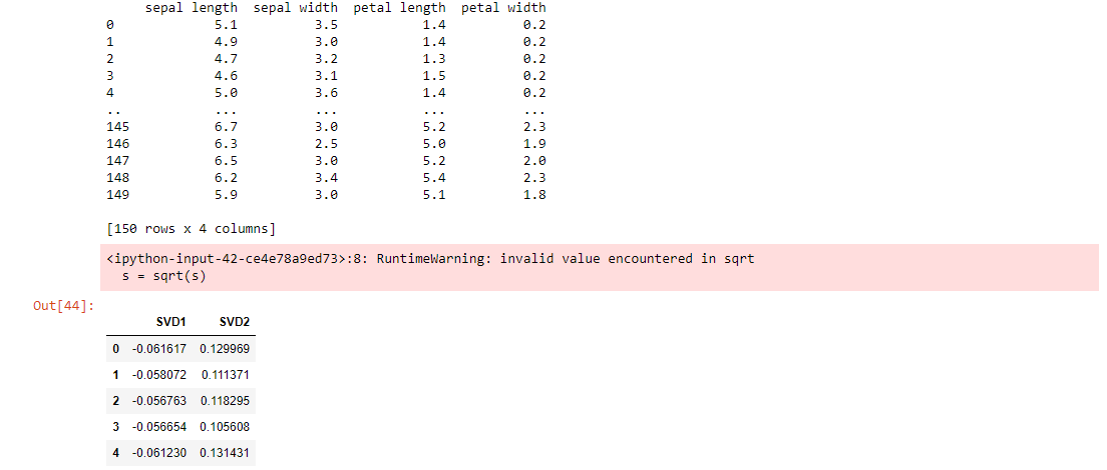

In [9]:
def changetosmaecolor(y,y2):    
    #kmeans 後把相對位置差不多的填上相同顏色
    dtype = [('name', int), ('index', int)]
    #找到該群出現的先後順序
    values = [(0, y.index("0")), (1, y.index("1")),
              (2, y.index("2"))]
    li1 = array(values, dtype=dtype)
    li1=sort(li1,order='index') #按照該群排序 便可將先後順序出現相同的填上同個顏色
    dtype = [('name', int), ('index', int)]
    values = [(0, y2.index("0")), (1, y2.index("1")),
              (2, y2.index("2"))]
    li2 = array(values, dtype=dtype)
    li2=sort(li2,order='index')
    return li1,li2

In [10]:
def plotfigure(x,mothod,topic):    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(mothod+' 1') 
    ax.set_ylabel(mothod+' 2') 
    ax.set_title(topic+" "+mothod+" dimension reduction") 
    targets = ['kmean1', 'kmean2', 'kmean3']
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
     indicesToKeep = x["target"] == target
     ax.scatter(x.loc[indicesToKeep, mothod+'1']
     , x.loc[indicesToKeep, mothod+'2']
     , c = color
     , s = 50)
    ax.legend(targets)
    ax.grid()

In [11]:
def changetosamecolor2(x,li):
    x.target[x['target']==str(li[0]['name'])]='kmean1'                              #把標籤=li1[0]['name']的換成kmean1
    x.target[x['target']==str(li[1]['name'])]='kmean2'
    x.target[x['target']==str(li[2]['name'])]='kmean3'                       
    return x 

<ipython-input-11-5cb75aaf6203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.target[x['target']==str(li[0]['name'])]='kmean1'                              #把標籤=li1[0]['name']的換成kmean1
<ipython-input-11-5cb75aaf6203>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.target[x['target']==str(li[1]['name'])]='kmean2'
<ipython-input-11-5cb75aaf6203>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.target[x['target']==str(li[2]['nam

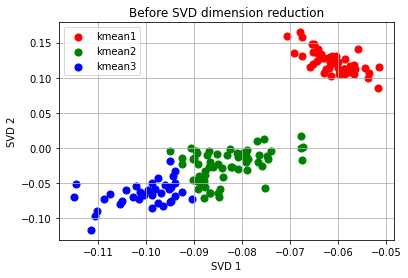

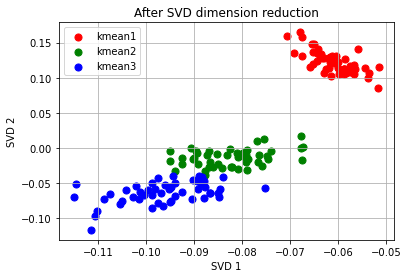

In [12]:
li1,li2=changetosmaecolor(y,y2)
newdata['target']=y
changetosamecolor2(newdata,li1)
plotfigure(newdata,'SVD',"Before")

newdata['target']=y2
changetosamecolor2(newdata,li2)
plotfigure(newdata,'SVD',"After")

# 輸出結果對照
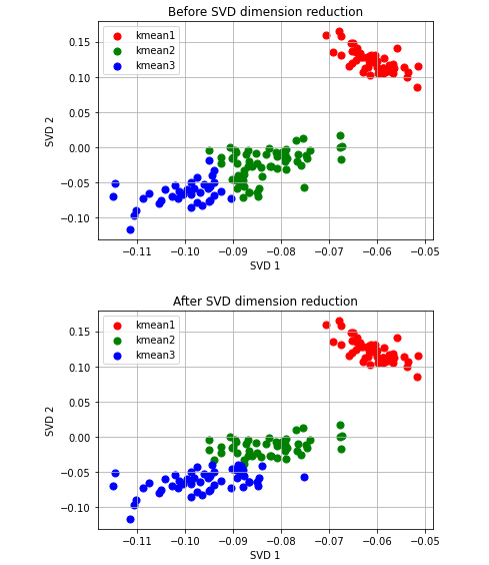

In [13]:
def normalize(x):
    from sklearn.preprocessing import StandardScaler
    x = StandardScaler().fit_transform(x)
    x = pd.DataFrame(x)                          
    return x 

# 計算PCA方式
## 1.建立資料(data)。
## 2.計算共變異數矩陣(cov)。
## 3.取得cov特徵量和特徵向量(eigen ,eigenV)
## 4.主成分向量$$PCA_i$$$$PCA_i = data*eigenV_i^T$$

In [49]:
def myPCA(x,dim):
    features = x.T
    cov_matrix = cov(features)                            
    values, vectors = eig(cov_matrix)          #Step3
    explained_varience(values)
    res = pd.DataFrame()
    for i in range(dim):
        col="PCA"+str(i+1)                           
        pcai=dot(dot(x,dot(vectors,vectors)),vectors[i].T)                           #Step4
        if i%2==1 :
            pcai=pcai*-1
        res[col] = pcai
    return res

# 計算explained variances
explained variances為每個主成分的解釋方差的百分比
$$ExplainedVariance_i = eigen_i \div  sum(eigen) \tag{1-1}$$

In [67]:
def explained_varience(eigen):
    explained_variances = []
    for i in range(len(eigen)):
        explained_variances.append(divide(eigen[i].T,sum(eigen)))           #-------(1-1)
    print("explained variances:"+str(explained_variances))   
 


In [68]:
variables = ['sepal length', 'sepal width', 'petal length', 'petal width']
PCAdata = df.loc[:, variables].values
nordata=normalize(PCAdata)                     #做PCA前的正規化
x_pca=myPCA(nordata,2)
y_pca =kmeans(nordata)                           #對原始資料做Kmeans
y2_pca =kmeans(x_pca)                          #對PCA降維後資料做Kmeans

x_pca.head()


explained variances:[0.7277045209380134, 0.23030523267680644, 0.03683831957627389, 0.005151926808906267]


,PCA1,PCA2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


# 輸出結果對照
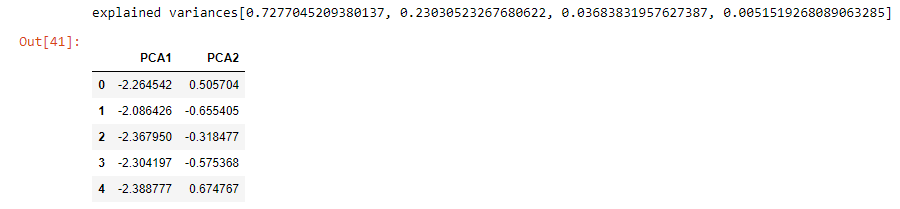

<ipython-input-11-5cb75aaf6203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.target[x['target']==str(li[0]['name'])]='kmean1'                              #把標籤=li1[0]['name']的換成kmean1
<ipython-input-11-5cb75aaf6203>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.target[x['target']==str(li[1]['name'])]='kmean2'
<ipython-input-11-5cb75aaf6203>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.target[x['target']==str(li[2]['nam

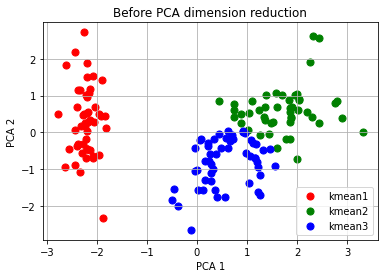

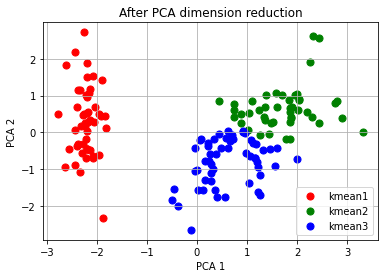

In [54]:
pcali1,pcali2=changetosmaecolor(y_pca,y2_pca)
x_pca['target']=y_pca
changetosamecolor2(x_pca,pcali1)
plotfigure(x_pca,'PCA','Before')

x_pca['target']=y2_pca
changetosamecolor2(x_pca,pcali2)
plotfigure(x_pca,'PCA','After')

# 輸出結果對照
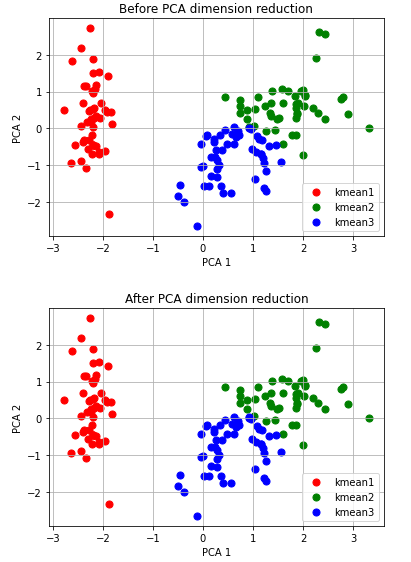

以下為 np套件中的svd 以及 sklearn 中的PCA 應用方式

In [20]:
def mysvd_np(x,dim):
    n = dim # We will take two Singular Values
    U, s, V = linalg.svd( x )
    return U, s, V

In [21]:
def myPCA_sk(x,dim):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=dim)
    x_pca = pca.fit_transform(x)
    x_pca = pd.DataFrame(x_pca)
    x_pca.columns = ['PCA1','PCA2']
    return x_pca 